## **2) 🕵️ Busqueda de los mejores hiperparametros**

In [1]:
import pandas as pd
import json, os

import sys
sys.path.append('..')
from py import models

Despues de haber hecho una busqueda exahustiva de los mejores hiperparametros, descargué todos los resultados en diferentes archivos csv.

Ahora lo que voy hacer es cargar esos resultados para encontrar los hiperparametros que mejor se adapten a las necesidades de mi proyecto.

In [2]:
archivos = os.listdir('../datasets/results')
dfs = [pd.read_csv(f'../datasets/results/{a}') for a in archivos]

df = pd.concat(dfs)
df.sample(5)

,model,hyperparameters,time,accuracy
8847,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance', 'alg...",0.131001,0.639785
2853,KNeighborsClassifier,"{'n_neighbors': 19, 'weights': 'distance', 'al...",0.169760,0.720430
18182,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'uniform', 'algo...",0.117998,0.672043
15931,KNeighborsClassifier,"{'n_neighbors': 2, 'weights': 'uniform', 'algo...",0.121078,0.682796
19256,KNeighborsClassifier,"{'n_neighbors': 14, 'weights': 'distance', 'al...",0.171182,0.725806


In [3]:
df.groupby('model').count()

,hyperparameters,time,accuracy
model,,,
DecisionTreeClassifier,531,531,531
KNeighborsClassifier,34200,34200,34200
LogisticRegression,1078,1078,980
RandomForestClassifier,9396,9396,9396


Como es probable que tenga hiperparametros fallidos o incompatibles, necesito eliminarlos.

In [4]:
# Elimino los valores nulos
df = df.dropna().reset_index(drop = True)
df.sample(5)

,model,hyperparameters,time,accuracy
25003,KNeighborsClassifier,"{'n_neighbors': 12, 'weights': 'uniform', 'alg...",0.109087,0.693548
43278,RandomForestClassifier,"{'n_estimators': 170, 'criterion': 'gini', 'ma...",1.720879,0.838710
17840,KNeighborsClassifier,"{'n_neighbors': 14, 'weights': 'uniform', 'alg...",0.168000,0.698925
29111,RandomForestClassifier,"{'n_estimators': 170, 'criterion': 'gini', 'ma...",1.818238,0.876344
18508,KNeighborsClassifier,"{'n_neighbors': 19, 'weights': 'uniform', 'alg...",0.280012,0.704301


In [5]:
# df.to_csv('../datasets/results/all-models-results.csv', index = False)

In [6]:
df.sort_values('accuracy', ascending=False)

,model,hyperparameters,time,accuracy
43652,RandomForestClassifier,"{'n_estimators': 150, 'criterion': 'entropy', ...",3.430956,0.881720
13799,RandomForestClassifier,"{'n_estimators': 140, 'criterion': 'entropy', ...",1.824711,0.881720
28551,RandomForestClassifier,"{'n_estimators': 150, 'criterion': 'entropy', ...",3.430956,0.881720
42203,RandomForestClassifier,"{'n_estimators': 130, 'criterion': 'gini', 'ma...",1.725055,0.881720
42291,RandomForestClassifier,"{'n_estimators': 100, 'criterion': 'gini', 'ma...",1.582156,0.881720
...,...,...,...,...
40986,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance', 'alg...",0.255325,0.639785
5398,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance', 'alg...",0.269728,0.639785
25090,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance', 'alg...",0.138041,0.639785
25095,KNeighborsClassifier,"{'n_neighbors': 3, 'weights': 'distance', 'alg...",0.082590,0.639785


#### KNeighborsClassifier

In [7]:
df.loc[df.model == 'KNeighborsClassifier'].sort_values('accuracy', ascending=False)[:5]

,model,hyperparameters,time,accuracy
25070,KNeighborsClassifier,"{'n_neighbors': 18, 'weights': 'distance', 'al...",0.193631,0.741935
5809,KNeighborsClassifier,"{'n_neighbors': 18, 'weights': 'distance', 'al...",0.168959,0.741935
35225,KNeighborsClassifier,"{'n_neighbors': 18, 'weights': 'distance', 'al...",0.252254,0.741935
30428,KNeighborsClassifier,"{'n_neighbors': 18, 'weights': 'distance', 'al...",0.176516,0.741935
39461,KNeighborsClassifier,"{'n_neighbors': 18, 'weights': 'distance', 'al...",0.184001,0.741935


#### RandomForestClassifier

In [8]:
df.loc[df.model == 'RandomForestClassifier'].sort_values('accuracy', ascending=False)[:5]

,model,hyperparameters,time,accuracy
12765,RandomForestClassifier,"{'n_estimators': 60, 'criterion': 'gini', 'max...",0.796552,0.88172
44716,RandomForestClassifier,"{'n_estimators': 200, 'criterion': 'gini', 'ma...",2.947827,0.88172
12001,RandomForestClassifier,"{'n_estimators': 130, 'criterion': 'gini', 'ma...",1.725055,0.88172
12089,RandomForestClassifier,"{'n_estimators': 100, 'criterion': 'gini', 'ma...",1.582156,0.88172
27200,RandomForestClassifier,"{'n_estimators': 60, 'criterion': 'entropy', '...",0.833916,0.88172


#### DecisionTreeClassifier

In [9]:
df.loc[df.model == 'DecisionTreeClassifier'].sort_values('accuracy', ascending=False)[:5]

,model,hyperparameters,time,accuracy
30140,DecisionTreeClassifier,"{'criterion': 'log_loss', 'max_depth': 5, 'acc...",0.023000,0.849462
134,DecisionTreeClassifier,"{'criterion': 'log_loss', 'max_depth': 5, 'acc...",0.023000,0.849462
138,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 5, 'accu...",0.028993,0.849462
15043,DecisionTreeClassifier,"{'criterion': 'entropy', 'max_depth': 5, 'accu...",0.028993,0.849462
15039,DecisionTreeClassifier,"{'criterion': 'log_loss', 'max_depth': 5, 'acc...",0.023000,0.849462


#### LogisticRegression

In [10]:
df.loc[df.model == 'LogisticRegression'].sort_values('accuracy', ascending=False)[:5]

,model,hyperparameters,time,accuracy
11663,LogisticRegression,"{'penalty': 'l2', 'C': 0.5, 'max_iter': 200, '...",0.042458,0.849462
11713,LogisticRegression,"{'penalty': 'l2', 'C': 0.5, 'max_iter': 300, '...",0.018001,0.849462
26614,LogisticRegression,"{'penalty': 'l2', 'C': 0.5, 'max_iter': 150, '...",0.012001,0.849462
26618,LogisticRegression,"{'penalty': 'l2', 'C': 0.5, 'max_iter': 300, '...",0.018001,0.849462
11606,LogisticRegression,"{'penalty': 'l2', 'C': 0.5, 'max_iter': 100, '...",0.045005,0.849462


Claramente los resultados del RandomForestClassifier son ampliamente superior. Entonces usaré este modelo para hacer mi prodecciones.

#### Selección de los mejores hiperparametros para **RandomForestClassifier**

In [11]:
rf_parameters = df.loc[df.model == 'RandomForestClassifier'].sort_values('accuracy', ascending=False)
best_parameters = rf_parameters.loc[rf_parameters.accuracy > 0.87]
best_parameters

,model,hyperparameters,time,accuracy
12765,RandomForestClassifier,"{'n_estimators': 60, 'criterion': 'gini', 'max...",0.796552,0.881720
44716,RandomForestClassifier,"{'n_estimators': 200, 'criterion': 'gini', 'ma...",2.947827,0.881720
12001,RandomForestClassifier,"{'n_estimators': 130, 'criterion': 'gini', 'ma...",1.725055,0.881720
12089,RandomForestClassifier,"{'n_estimators': 100, 'criterion': 'gini', 'ma...",1.582156,0.881720
27200,RandomForestClassifier,"{'n_estimators': 60, 'criterion': 'entropy', '...",0.833916,0.881720
...,...,...,...,...
13787,RandomForestClassifier,"{'n_estimators': 200, 'criterion': 'gini', 'ma...",2.647440,0.870968
42169,RandomForestClassifier,"{'n_estimators': 250, 'criterion': 'entropy', ...",6.349880,0.870968
42171,RandomForestClassifier,"{'n_estimators': 270, 'criterion': 'entropy', ...",3.793569,0.870968
27582,RandomForestClassifier,"{'n_estimators': 160, 'criterion': 'entropy', ...",2.691371,0.870968


In [12]:
best_parameters = pd.json_normalize(best_parameters.hyperparameters.apply(eval))
best_parameters.head()

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,accuracy
0,60,gini,16,4,2,0.88172
1,200,gini,7,4,2,0.88172
2,130,gini,8,2,2,0.88172
3,100,gini,9,2,2,0.88172
4,60,entropy,10,2,2,0.88172


In [13]:
best_parameters.sort_values(
    by = ['accuracy', 'n_estimators','max_depth', 'min_samples_split'],
    ascending = [False, True, True, True]).head()

,n_estimators,criterion,max_depth,min_samples_split,min_samples_leaf,accuracy
23,40,entropy,12,4,2,0.88172
30,40,entropy,12,4,2,0.88172
34,40,entropy,12,4,2,0.88172
17,40,gini,17,2,2,0.88172
19,40,gini,17,2,2,0.88172


<mark>Acá puedo notar que los mejores hiperparametros para el random forest son los siguientes:

- **n_estimators: 40**
- **criterion: gini**
- **max_depth: 17**
- **min_samples_split: 2**
- **min_samples_leaf: 2**


In [14]:
best_parameters.iloc[6].to_json()

'{"n_estimators":60,"criterion":"entropy","max_depth":10,"min_samples_split":2,"min_samples_leaf":2,"accuracy":0.8817204301}'

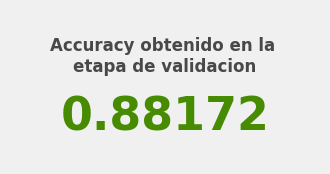

In [16]:
import matplotlib.pyplot as plt

acc = 0.88172
fig, ax = plt.subplots(figsize=(4, 2))
fig.patch.set_facecolor('#f0f0f0')

ax.axis('off')
ax.text(0.5, 0.7, 'Accuracy obtenido en la \netapa de validacion', ha='center', va='center', fontsize=12, color='#484848', weight='bold')
ax.text(0.5, 0.3, f"{acc:.5f}", ha='center', va='center', fontsize=33, color='#468b00', weight='bold')

plt.show()